# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
#print(weather_api_key)

## Generate Cities List

In [41]:
# List for holding lat_lngs and cities and country
lat_lngs = []
cities = []
country = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1])
    
    # If the city is unique, then add it to a our cities list
    if city.city_name not in cities:
        cities.append(city.city_name)
        country.append(city.country_code.upper())

# Print the city count to confirm sufficient count
len(cities)

605

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [42]:
# URL 
openweathermap_url = "http://api.openweathermap.org/data/2.5/weather?"
# Data in imperial units
units = "imperial"

In [43]:
# URL to invoke
# Parameters
# q 	required	 City name, state code and country code divided by comma, use ISO 3166 country codes.
# api_key 	required	 Your unique API key (you can always find it on your account page under the "API key" tab)
# units 	optional	 Units of measurement. standard, metric and imperial units are available.
# mode  	optional	 Response format. Possible values are xml and html. If you don't use the mode parameter format is JSON by default
openweathermap_url_full = f"{openweathermap_url}appid={weather_api_key}&units={units}&q="

In [50]:
# Create lists to save api response for every city
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
dates = []
# already saved cities = [] and country = []

print('Beginning Data Retrieval')
print('-----------------------------')
print('')
for city in range(len(cities)):
    # Pause 5 seconds to avoid This message Your OpenWeatherMap API key is temporary blocked 
    # due to the continual sufficient exceeding of the calls per minute limit 
    # by performing 618 requests within a minute but the limit for the Free account is 60 rpm.
    time.sleep(2) 
    response = requests.get(f"{openweathermap_url_full}{cities[city]},{country[city]}").json()

    try:
        # Verify if response has name key value
        test = response['main']['temp_max']

        # Some cities don't have data in openweathermap, so set their values to NaN
        try:
            max_temp.append(response['main']['temp_max'])
        except KeyError:
            max_temp.append(np.nan)
        try:
            lat.append(response['coord']['lat'])
        except KeyError:
            lat.append(np.nan)

        try:
            lng.append(response['coord']['lon'])
        except KeyError:
            lng.append(np.nan)  

        try:
            humidity.append(response['main']['humidity'])
        except KeyError:
            humidity.append(np.nan) 

        try:
            wind_speed.append(response['wind']['speed'])
        except KeyError:
            wind_speed.append(np.nan) 

        try:
            dates.append(response['dt'])
        except KeyError:
            dates.append(np.nan) 

        try:
            cloudiness.append(response['clouds']['all'])
        except KeyError:
            cloudiness.append(0)

        # Print each city name and query string    
        print(f"Processing record {city + 1} of Set 1 | {cities[city]}")

    except KeyError:
        print("City not found. Skipping...")
        max_temp.append(np.nan)
        lat.append(np.nan)
        lng.append(np.nan)      
        humidity.append(np.nan) 
        wind_speed.append(np.nan) 
        dates.append(np.nan) 
        cloudiness.append(0)





Beginning Data Retrieval
-----------------------------

Processing record 1 of Set 1 | college
Processing record 2 of Set 1 | boende
Processing record 3 of Set 1 | martapura
Processing record 4 of Set 1 | east london
Processing record 5 of Set 1 | clearwater
Processing record 6 of Set 1 | vanavara
Processing record 7 of Set 1 | rikitea
City not found. Skipping...
Processing record 9 of Set 1 | barrow
Processing record 10 of Set 1 | chai nat
Processing record 11 of Set 1 | la ronge
City not found. Skipping...
Processing record 13 of Set 1 | ballangen
Processing record 14 of Set 1 | khipro
Processing record 15 of Set 1 | chuy
Processing record 16 of Set 1 | port macquarie
Processing record 17 of Set 1 | butaritari
Processing record 18 of Set 1 | port alfred
City not found. Skipping...
Processing record 20 of Set 1 | atuona
Processing record 21 of Set 1 | bluff
Processing record 22 of Set 1 | aklavik
Processing record 23 of Set 1 | vaini
Processing record 24 of Set 1 | cape town
Processin

Processing record 203 of Set 1 | banepa
Processing record 204 of Set 1 | thompson
Processing record 205 of Set 1 | kuah
Processing record 206 of Set 1 | port elizabeth
Processing record 207 of Set 1 | sinfra
Processing record 208 of Set 1 | hudson bay
City not found. Skipping...
Processing record 210 of Set 1 | sioux lookout
Processing record 211 of Set 1 | khatanga
Processing record 212 of Set 1 | kachiry
Processing record 213 of Set 1 | katsuura
Processing record 214 of Set 1 | selenduma
Processing record 215 of Set 1 | camocim
Processing record 216 of Set 1 | mantua
Processing record 217 of Set 1 | richards bay
Processing record 218 of Set 1 | tadine
Processing record 219 of Set 1 | polovinnoye
Processing record 220 of Set 1 | sao filipe
Processing record 221 of Set 1 | saint-augustin
Processing record 222 of Set 1 | fortuna
Processing record 223 of Set 1 | maceio
City not found. Skipping...
Processing record 225 of Set 1 | ponta do sol
Processing record 226 of Set 1 | san patricio


Processing record 405 of Set 1 | hilo
Processing record 406 of Set 1 | maragogi
Processing record 407 of Set 1 | talnakh
Processing record 408 of Set 1 | nishihara
Processing record 409 of Set 1 | neiafu
Processing record 410 of Set 1 | granja
Processing record 411 of Set 1 | mount darwin
Processing record 412 of Set 1 | rodrigues alves
City not found. Skipping...
Processing record 414 of Set 1 | dingle
Processing record 415 of Set 1 | aizkraukle
Processing record 416 of Set 1 | male
Processing record 417 of Set 1 | majene
Processing record 418 of Set 1 | ossora
Processing record 419 of Set 1 | kinshasa
Processing record 420 of Set 1 | lazaro cardenas
Processing record 421 of Set 1 | haimen
Processing record 422 of Set 1 | abu kamal
Processing record 423 of Set 1 | lujan
Processing record 424 of Set 1 | amapa
Processing record 425 of Set 1 | durusu
City not found. Skipping...
Processing record 427 of Set 1 | the valley
Processing record 428 of Set 1 | lebu
Processing record 429 of Set 

In [13]:
# Expected results

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | butaritari
Processing Record 2 of Set 1 | yerbogachen
Processing Record 3 of Set 1 | cape town
Processing Record 4 of Set 1 | touba
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | rio grande
Processing Record 7 of Set 1 | ibra
Processing Record 8 of Set 1 | port elizabeth
Processing Record 9 of Set 1 | tuktoyaktuk
Processing Record 10 of Set 1 | avarua
Processing Record 11 of Set 1 | nemuro
Processing Record 12 of Set 1 | morgan city
Processing Record 13 of Set 1 | hobart
Processing Record 14 of Set 1 | kawalu
Processing Record 15 of Set 1 | hami
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | katsuura
Processing Record 18 of Set 1 | hjallerup
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | bengkulu
Processing Record 21 of Set 1 | victoria
Processing Record 22 of Set 1 | rangapara
Processing Record 23 of Set 1 | hithadho

Processing Record 36 of Set 4 | chimbote
Processing Record 37 of Set 4 | kanor
Processing Record 38 of Set 4 | san pedro de uraba
Processing Record 39 of Set 4 | taphan hin
Processing Record 40 of Set 4 | upernavik
Processing Record 41 of Set 4 | matagami
Processing Record 42 of Set 4 | terme
Processing Record 43 of Set 4 | coria
Processing Record 44 of Set 4 | pallasovka
Processing Record 45 of Set 4 | asyut
Processing Record 46 of Set 4 | cockburn town
Processing Record 47 of Set 4 | osypenko
Processing Record 48 of Set 4 | sioux lookout
Processing Record 49 of Set 4 | gotsu
Processing Record 0 of Set 5 | abadan
Processing Record 1 of Set 5 | lewistown
Processing Record 2 of Set 5 | toftir
City not found. Skipping...
Processing Record 3 of Set 5 | fortuna
Processing Record 4 of Set 5 | ostersund
Processing Record 5 of Set 5 | calafell
Processing Record 6 of Set 5 | panguna
Processing Record 7 of Set 5 | nantucket
Processing Record 8 of Set 5 | la ronge
Processing Record 9 of Set 5 | 

City not found. Skipping...
Processing Record 28 of Set 8 | porto walter
Processing Record 29 of Set 8 | horsham
Processing Record 30 of Set 8 | maraa
Processing Record 31 of Set 8 | vila franca do campo
Processing Record 32 of Set 8 | garoua
Processing Record 33 of Set 8 | kampot
Processing Record 34 of Set 8 | marawi
Processing Record 35 of Set 8 | egvekinot
Processing Record 36 of Set 8 | liverpool
Processing Record 37 of Set 8 | sanandaj
Processing Record 38 of Set 8 | tabou
Processing Record 39 of Set 8 | kavieng
Processing Record 40 of Set 8 | cap malheureux
Processing Record 41 of Set 8 | logan
Processing Record 42 of Set 8 | klaksvik
Processing Record 43 of Set 8 | sisimiut
Processing Record 44 of Set 8 | whyalla
Processing Record 45 of Set 8 | attawapiskat
City not found. Skipping...
Processing Record 46 of Set 8 | hailar
Processing Record 47 of Set 8 | ajdabiya
Processing Record 48 of Set 8 | saint-georges
Processing Record 49 of Set 8 | hoopstad
Processing Record 0 of Set 9 

Processing Record 19 of Set 12 | barra dos coqueiros
Processing Record 20 of Set 12 | provideniya
Processing Record 21 of Set 12 | norman wells
Processing Record 22 of Set 12 | yuzhno-yeniseyskiy
City not found. Skipping...
Processing Record 23 of Set 12 | follonica
Processing Record 24 of Set 12 | verkhoyansk
Processing Record 25 of Set 12 | henties bay
Processing Record 26 of Set 12 | kudahuvadhoo
Processing Record 27 of Set 12 | bandundu
Processing Record 28 of Set 12 | cascais
Processing Record 29 of Set 12 | dickinson
Processing Record 30 of Set 12 | san benito
Processing Record 31 of Set 12 | kenai
Processing Record 32 of Set 12 | rio pardo de minas
Processing Record 33 of Set 12 | erzin
Processing Record 34 of Set 12 | san carlos del zulia
Processing Record 35 of Set 12 | kyshtovka
Processing Record 36 of Set 12 | zima
Processing Record 37 of Set 12 | khandbari
Processing Record 38 of Set 12 | salyan
Processing Record 39 of Set 12 | saint-joseph
Processing Record 40 of Set 12 | 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [147]:
# Assemble everything into a data frame
weather_df = pd.DataFrame({"City": cities,
                           "Lat": lat,
                           "Lng": lng,
                           "Max Temp": max_temp,
                           "Humidity": humidity,
                           "Cloudiness": cloudiness,
                           "Wind Speed": wind_speed,
                           "Country": country,
                           "Date": dates
                          })

# Remove any lines with NaN values
weather_cleaned_df = weather_df.dropna(how='any')

# Export the city data into a .csv.
weather_cleaned_df.to_csv(output_data_file, index=False, header=True)

# Display the DataFrame
weather_cleaned_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,college,64.8569,-147.8028,5.00,65.0,20,1.61,US,1.613183e+09
1,boende,-0.2167,20.8667,75.00,70.0,100,1.30,CD,1.613183e+09
2,martapura,-3.4167,114.8500,82.40,83.0,40,4.61,ID,1.613183e+09
3,east london,-33.0153,27.9116,74.79,80.0,12,11.63,ZA,1.613183e+09
4,clearwater,27.9659,-82.8001,72.00,94.0,100,4.32,US,1.613183e+09


In [15]:
# Expected results

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


In [53]:
weather_cleaned_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,5.370000e+02
mean,18.097759,20.416638,49.941304,74.564246,51.692737,8.054562,1.613184e+09
std,34.102197,93.029656,33.997201,18.341395,39.785439,6.604958,3.814156e+02
min,-54.800000,-175.200000,-35.990000,1.000000,0.000000,0.180000,1.613183e+09
25%,-9.766700,-63.057800,28.000000,68.000000,4.000000,3.440000,1.613183e+09
50%,19.385000,25.166700,66.200000,78.000000,56.000000,6.290000,1.613184e+09
75%,49.166700,108.208200,75.340000,88.000000,90.000000,10.740000,1.613184e+09
max,78.218600,179.316700,93.200000,100.000000,100.000000,47.620000,1.613184e+09


In [16]:
# Expected results

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,5.990000e+02
mean,19.877028,19.568998,69.794808,69.353923,51.569282,7.979416,1.593605e+09
std,33.262944,91.418472,15.678452,22.704698,35.405602,5.660694,5.738815e+01
min,-54.800000,-179.170000,12.200000,7.000000,0.000000,0.360000,1.593605e+09
25%,-8.540000,-61.210000,59.000000,55.000000,20.000000,3.620000,1.593605e+09
50%,24.370000,24.670000,73.110000,75.000000,59.000000,6.730000,1.593605e+09
75%,46.585000,102.255000,80.600000,87.000000,85.000000,11.050000,1.593605e+09
max,78.220000,179.320000,116.600000,100.000000,100.000000,42.500000,1.593605e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
# Inspecting weather_cleaned_df statistics. Max value in Humidity column is 100% so skipping this step

In [6]:
# Expected results

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [17]:
#  Get the indices of cities that have humidity over 100%.
# Inspecting weather_cleaned_df statistics. Max value in Humidity column is 100% so skipping this step

Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

# Inspecting weather_cleaned_df statistics. Max value in Humidity column is 100% so skipping this step

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

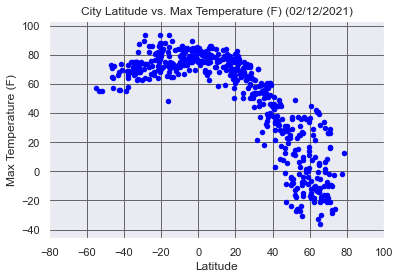

In [93]:

latitude_vs_temperature_plt = weather_cleaned_df.plot(kind="scatter", x="Lat", y="Max Temp", color='blue', 
                                      title="City Latitude vs. Max Temperature (F) (02/12/2021)")

plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(b=True, which='major', color='#666666', linestyle='-')

# Ticks
plt.xlim(-80,100)
plt.ylim(min(weather_cleaned_df['Max Temp']) - 10, max(weather_cleaned_df['Max Temp']) + 10)

plt.show()

latitude_vs_temperature_plot.get_figure().savefig("Latitude_vs_Temperature.png")

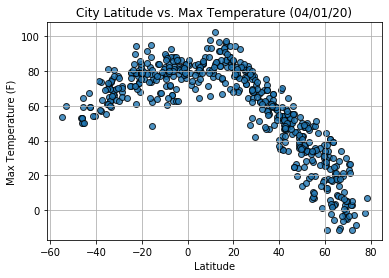

In [10]:
# Expected results

## Latitude vs. Humidity Plot

<Figure size 720x576 with 0 Axes>

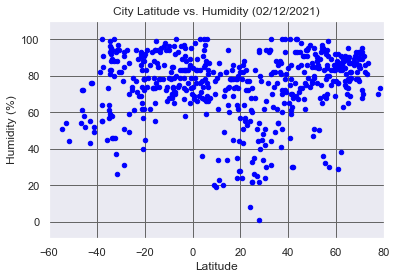

In [94]:
# Set size of the figure
plt.figure(figsize=(10,8))

latitude_vs_humidity_plt = weather_cleaned_df.plot(kind="scatter", x="Lat", y="Humidity", color='blue', 
                                      title="City Latitude vs. Humidity (02/12/2021)")

plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(b=True, which='major', color='#666666', linestyle='-')

# Ticks
plt.xlim(-60,80)
plt.ylim(min(weather_cleaned_df['Humidity']) - 10, max(weather_cleaned_df['Humidity']) + 10)

plt.show()

# Save image
latitude_vs_humidity_plt.get_figure().savefig("Latitude_vs_Humidity.png")

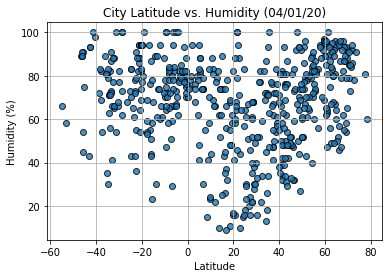

In [11]:
# Expected results

## Latitude vs. Cloudiness Plot

<Figure size 720x576 with 0 Axes>

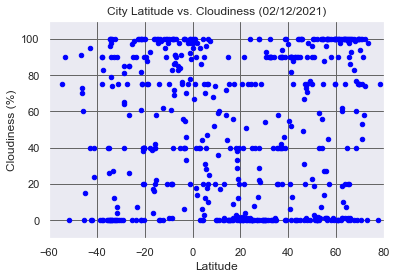

In [96]:
# Set size of the figure
plt.figure(figsize=(10,8))

latitude_vs_cloudiness_plt = weather_cleaned_df.plot(kind="scatter", x="Lat", y="Cloudiness", color='blue', 
                                      title="City Latitude vs. Cloudiness (02/12/2021)")

plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(b=True, which='major', color='#666666', linestyle='-')

# Ticks
plt.xlim(-60,80)
plt.ylim(min(weather_cleaned_df['Cloudiness']) - 10, max(weather_cleaned_df['Cloudiness']) + 10)

plt.show()

# Save image
latitude_vs_cloudiness_plt.get_figure().savefig("Latitude_vs_Cloudiness.png")

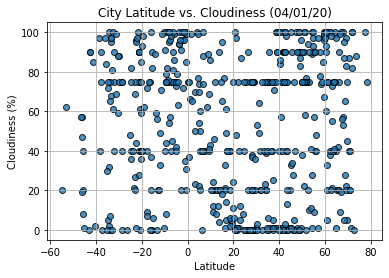

In [12]:
# Expected results

## Latitude vs. Wind Speed Plot

<Figure size 720x576 with 0 Axes>

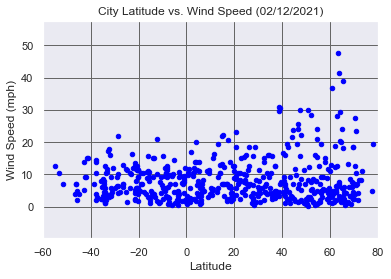

In [97]:
# Set size of the figure
plt.figure(figsize=(10,8))

latitude_vs_wind_speed_plt = weather_cleaned_df.plot(kind="scatter", x="Lat", y="Wind Speed", color='blue', 
                                      title="City Latitude vs. Wind Speed (02/12/2021)")

plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(b=True, which='major', color='#666666', linestyle='-')

# Ticks
plt.xlim(-60,80)
plt.ylim(min(weather_cleaned_df['Wind Speed']) - 10, max(weather_cleaned_df['Wind Speed']) + 10)

plt.show()

# Save image
latitude_vs_wind_speed_plt.get_figure().savefig("Latitude_vs_Wind_Speed.png")

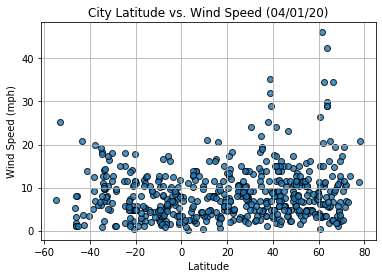

In [13]:
# Expected results

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

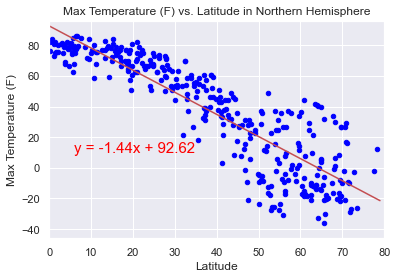

In [136]:
# Northern Hemisphere DataFrame is where Latitude above ecuador i.e. > 0
northern_hemisphere_df = weather_cleaned_df.loc[weather_cleaned_df["Lat"] >= 0]

# Linear Regression
(n_hem_slope, n_hem_intercept, n_hem_r_val, _, _) = linregress(northern_hemisphere_df["Lat"], northern_hemisphere_df["Max Temp"])

regr_line_x = np.array([la for la in range(80)])
regr_line_y = n_hem_slope * regr_line_x + n_hem_intercept


# Plot northern hemisphere values
n_hem_axes = northern_hemisphere_df.plot(kind="scatter", x="Lat", y="Max Temp", color='blue',  
                                       title="Max Temperature (F) vs. Latitude in Northern Hemisphere")

plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Ticks
plt.xlim(0,80)
plt.ylim(min(northern_hemisphere_df['Max Temp']) - 10, max(northern_hemisphere_df['Max Temp']) + 10)

# Add the linear regression equation and line to plot
n_hem_axes.plot(regr_line_x, regr_line_y, 'r')

line_eq = "y = " + str(round(n_hem_slope,2)) + "x + " + str(round(n_hem_intercept,2))

plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Save image
n_hem_axes.get_figure().savefig("Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

The r-value is: 0.46937863826630627


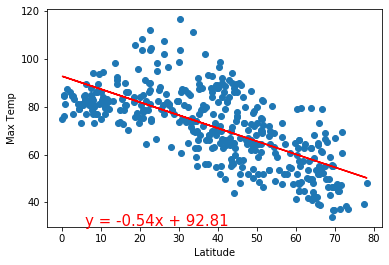

In [25]:
# Expected results

#  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared correlation coefficient for this line is 0.52


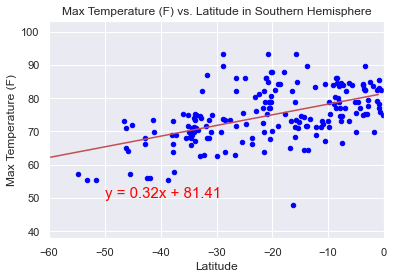

In [137]:
# Southern Hemisphere DataFrame is where Latitude beneath ecuador i.e. < 0
southern_hemisphere_df = weather_cleaned_df.loc[weather_cleaned_df["Lat"] <= 0]

# Linear Regression
(s_hem_slope, s_hem_intercept, s_hem_r_val, _, _) = linregress(southern_hemisphere_df["Lat"], southern_hemisphere_df["Max Temp"])

regr_line_x = np.array([la for la in range(-60,0)])
regr_line_y = s_hem_slope * regr_line_x + s_hem_intercept

print("The r-squared correlation coefficient for this line is {:.2f}".format(s_hem_r_val))

# Plot northern hemisphere values
s_hem_axes = southern_hemisphere_df.plot(kind="scatter", x="Lat", y="Max Temp", color='blue',  
                                       title="Max Temperature (F) vs. Latitude in Southern Hemisphere")

plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Ticks
plt.xlim(-60,0)
plt.ylim(min(southern_hemisphere_df['Max Temp']) - 10, max(southern_hemisphere_df['Max Temp']) + 10)

# Add the linear regression equation and line to plot
s_hem_axes.plot(regr_line_x, regr_line_y, 'r')

line_eq = "y = " + str(round(s_hem_slope,2)) + "x + " + str(round(s_hem_intercept,2))

plt.annotate(line_eq,(-50,50),fontsize=15,color="red")

# Save image
s_hem_axes.get_figure().savefig("Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

The r-value is: 0.6082708688906918


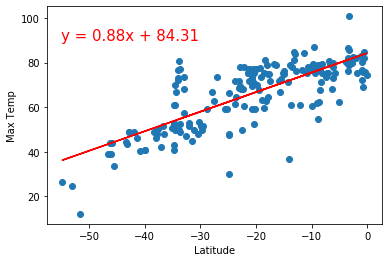

In [26]:
# Expected results

# Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared correlation coefficient for this line is 0.28


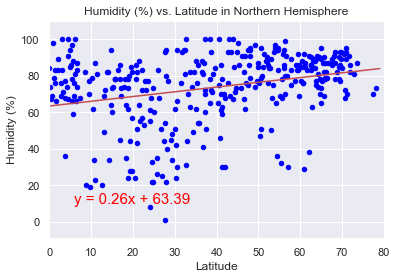

In [138]:

# Linear Regression
(n_hem_slope, n_hem_intercept, n_hem_r_val, _, _) = linregress(northern_hemisphere_df["Lat"], northern_hemisphere_df["Humidity"])

regr_line_x = np.array([la for la in range(80)])
regr_line_y = n_hem_slope * regr_line_x + n_hem_intercept

print("The r-squared correlation coefficient for this line is {:.2f}".format(n_hem_r_val))

# Plot northern hemisphere values
n_hem_axes = northern_hemisphere_df.plot(kind="scatter", x="Lat", y="Humidity", color='blue',  
                                       title="Humidity (%) vs. Latitude in Northern Hemisphere")

plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Ticks
plt.xlim(0,80)
plt.ylim(min(northern_hemisphere_df['Humidity']) - 10, max(northern_hemisphere_df['Humidity']) + 10)

# Add the linear regression equation and line to plot
n_hem_axes.plot(regr_line_x, regr_line_y, 'r')

line_eq = "y = " + str(round(n_hem_slope,2)) + "x + " + str(round(n_hem_intercept,2))

plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Save image
s_hem_axes.get_figure().savefig("Northern Hemisphere - Humidity vs. Latitude Linear Regression.png")

The r-value is: 0.000543987878808455


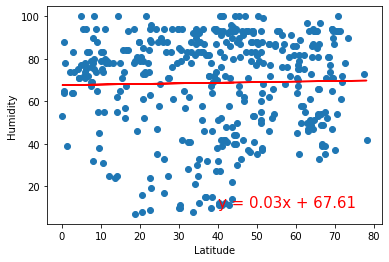

In [27]:
# Expected results

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared correlation coefficient for this line is 0.32


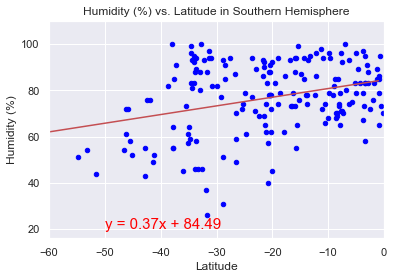

In [139]:
# Linear Regression
(s_hem_slope, s_hem_intercept, s_hem_r_val, _, _) = linregress(southern_hemisphere_df["Lat"], southern_hemisphere_df["Humidity"])

regr_line_x = np.array([la for la in range(-60,0)])
regr_line_y = s_hem_slope * regr_line_x + s_hem_intercept

print("The r-squared correlation coefficient for this line is {:.2f}".format(s_hem_r_val))

# Plot northern hemisphere values
s_hem_axes = southern_hemisphere_df.plot(kind="scatter", x="Lat", y="Humidity", color='blue',  
                                       title="Humidity (%) vs. Latitude in Southern Hemisphere")

plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Ticks
plt.xlim(-60,0)
plt.ylim(min(southern_hemisphere_df['Humidity']) - 10, max(southern_hemisphere_df['Humidity']) + 10)

# Add the linear regression equation and line to plot
s_hem_axes.plot(regr_line_x, regr_line_y, 'r')

line_eq = "y = " + str(round(s_hem_slope,2)) + "x + " + str(round(s_hem_intercept,2))

plt.annotate(line_eq,(-50,20),fontsize=15,color="red")

# Save image
s_hem_axes.get_figure().savefig("Southern Hemisphere - Humidity vs. Latitude Linear Regression.png")

The r-value is: 0.014985174297345524


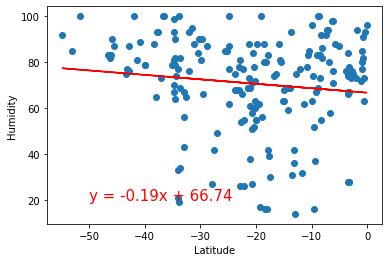

In [28]:
# Expected results

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared correlation coefficient for this line is 0.24


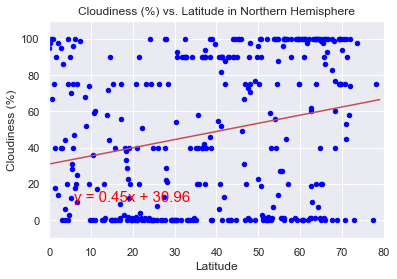

In [140]:

# Linear Regression
(n_hem_slope, n_hem_intercept, n_hem_r_val, _, _) = linregress(northern_hemisphere_df["Lat"], northern_hemisphere_df["Cloudiness"])

regr_line_x = np.array([la for la in range(80)])
regr_line_y = n_hem_slope * regr_line_x + n_hem_intercept

print("The r-squared correlation coefficient for this line is {:.2f}".format(n_hem_r_val))

# Plot northern hemisphere values
n_hem_axes = northern_hemisphere_df.plot(kind="scatter", x="Lat", y="Cloudiness", color='blue',  
                                       title="Cloudiness (%) vs. Latitude in Northern Hemisphere")

plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Ticks
plt.xlim(0,80)
plt.ylim(min(northern_hemisphere_df['Cloudiness']) - 10, max(northern_hemisphere_df['Cloudiness']) + 10)

# Add the linear regression equation and line to plot
n_hem_axes.plot(regr_line_x, regr_line_y, 'r')

line_eq = "y = " + str(round(n_hem_slope,2)) + "x + " + str(round(n_hem_intercept,2))

plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Save image
s_hem_axes.get_figure().savefig("Northern Hemisphere - Cloudiness vs. Latitude Linear Regression.png")

The r-value is: 0.0020898727664228514


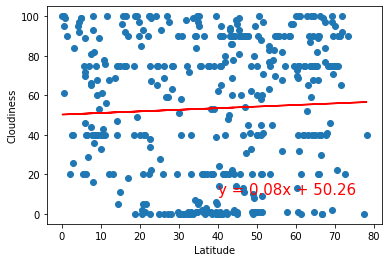

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared correlation coefficient for this line is 0.28


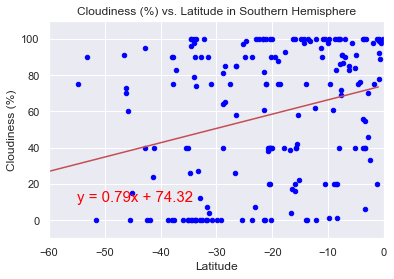

In [141]:
# Linear Regression
(s_hem_slope, s_hem_intercept, s_hem_r_val, _, _) = linregress(southern_hemisphere_df["Lat"], southern_hemisphere_df["Cloudiness"])

regr_line_x = np.array([la for la in range(-60,0)])
regr_line_y = s_hem_slope * regr_line_x + s_hem_intercept

print("The r-squared correlation coefficient for this line is {:.2f}".format(s_hem_r_val))

# Plot northern hemisphere values
s_hem_axes = southern_hemisphere_df.plot(kind="scatter", x="Lat", y="Cloudiness", color='blue',  
                                       title="Cloudiness (%) vs. Latitude in Southern Hemisphere")

plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Ticks
plt.xlim(-60,0)
plt.ylim(min(southern_hemisphere_df['Cloudiness']) - 10, max(southern_hemisphere_df['Cloudiness']) + 10)

# Add the linear regression equation and line to plot
s_hem_axes.plot(regr_line_x, regr_line_y, 'r')

line_eq = "y = " + str(round(s_hem_slope,2)) + "x + " + str(round(s_hem_intercept,2))

plt.annotate(line_eq,(-55,10),fontsize=15,color="red")

# Save image
s_hem_axes.get_figure().savefig("Southern Hemisphere - Cloudiness vs. Latitude Linear Regression.png")

The r-value is: 0.0035263772085582894


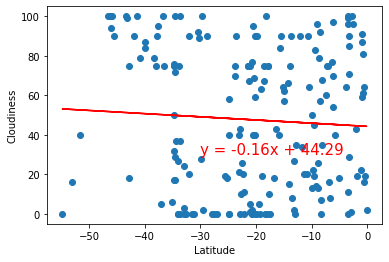

In [30]:
# Expected results

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared correlation coefficient for this line is 0.06


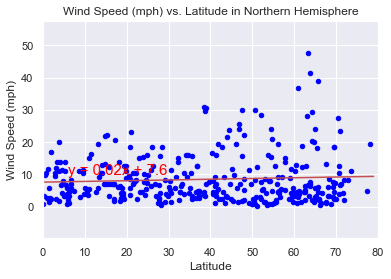

In [142]:
# Linear Regression
(n_hem_slope, n_hem_intercept, n_hem_r_val, _, _) = linregress(northern_hemisphere_df["Lat"], northern_hemisphere_df["Wind Speed"])

regr_line_x = np.array([la for la in range(80)])
regr_line_y = n_hem_slope * regr_line_x + n_hem_intercept

print("The r-squared correlation coefficient for this line is {:.2f}".format(n_hem_r_val))

# Plot northern hemisphere values
n_hem_axes = northern_hemisphere_df.plot(kind="scatter", x="Lat", y="Wind Speed", color='blue',  
                                       title="Wind Speed (mph) vs. Latitude in Northern Hemisphere")

plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Ticks
plt.xlim(0,80)
plt.ylim(min(northern_hemisphere_df['Wind Speed']) - 10, max(northern_hemisphere_df['Wind Speed']) + 10)

# Add the linear regression equation and line to plot
n_hem_axes.plot(regr_line_x, regr_line_y, 'r')

line_eq = "y = " + str(round(n_hem_slope,2)) + "x + " + str(round(n_hem_intercept,2))

plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Save image
s_hem_axes.get_figure().savefig("Northern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")

The r-value is: 0.04019723576144484


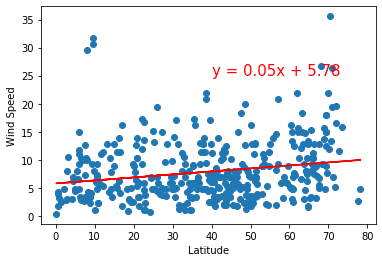

In [31]:
# Expected results

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared correlation coefficient for this line is -0.10


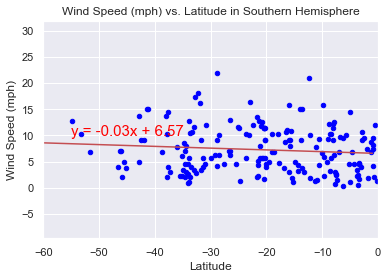

In [143]:
# Linear Regression
(s_hem_slope, s_hem_intercept, s_hem_r_val, _, _) = linregress(southern_hemisphere_df["Lat"], southern_hemisphere_df["Wind Speed"])

regr_line_x = np.array([la for la in range(-60,0)])
regr_line_y = s_hem_slope * regr_line_x + s_hem_intercept

print("The r-squared correlation coefficient for this line is {:.2f}".format(s_hem_r_val))

# Plot northern hemisphere values
s_hem_axes = southern_hemisphere_df.plot(kind="scatter", x="Lat", y="Wind Speed", color='blue',  
                                       title="Wind Speed (mph) vs. Latitude in Southern Hemisphere")

plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Ticks
plt.xlim(-60,0)
plt.ylim(min(southern_hemisphere_df['Wind Speed']) - 10, max(southern_hemisphere_df['Wind Speed']) + 10)

# Add the linear regression equation and line to plot
s_hem_axes.plot(regr_line_x, regr_line_y, 'r')

line_eq = "y = " + str(round(s_hem_slope,2)) + "x + " + str(round(s_hem_intercept,2))

plt.annotate(line_eq,(-55,10),fontsize=15,color="red")

# Save image
s_hem_axes.get_figure().savefig("Southern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")

The r-value is: 0.017128274759839232


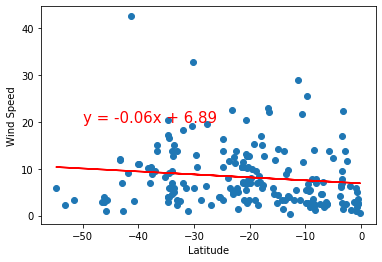

In [32]:
# Expected results